Assignment 1:
Clustering - 2D Point Cloud Segmentation

Overview: In this assignment, I explore clustering techniques on a dataset of two-dimensional (2D) points. The training data contains structured clusters, and the objective is to uncover these patterns using clustering algorithms. Once the model is trained, it is used to assign labels to a separate set of unlabeled test points, effectively identifying the underlying structure in new data based on the learned patterns.

## Task 1:  Load and visualize the training dataset. 
Once that is loaded, we can use the Python library, matplotlib, which plots the training data on a 2D plane, as shown below.

            x           y
0  121.561996   81.001999
1  127.569000  113.457001
2   95.467003  116.822998
3  652.234009   60.743000
4  324.015991   91.058998


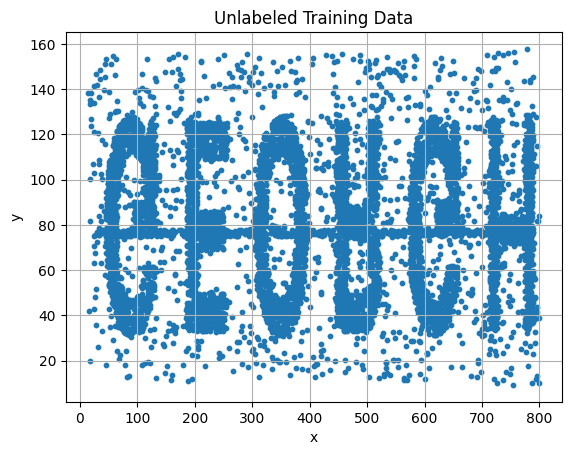

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the training data
train = pd.read_csv('/Users/VarshiniPeddinti/Downloads/clusterData_train.dat', sep=' ', header=None, names=['x', 'y'])
print(train.head(5))

# Visualize the data on an x,y plane
plt.scatter(train['x'], train['y'], s=10)
plt.title('Unlabeled Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Convert the DataFrame into a NumPy array
X = train[['x', 'y']].values

The Unlabeled Training Data is shown above. From the human eye, one is able to identify certain clusters, as the data points create certain letters/shapes. Let's apply the unsupervised machine learning algorithm, K-Means, to group data points into k clusters.

## Task 2: Apply the K-Means Clustering Algorithm

K-Means Steps:
1. Initialization:
- Randomly select k initial cluster centers (called centroids)
2. Assignment Step:
- For each data point, compute its distance to all centroids
- Assign each point to the cluster with the nearest centroid
3. Update Step:
- For each cluster, recalculate the centroid as the mean of all assigned points.
4. Repeat Steps 2 and 3 until:
- The cluster assignments do not change, or
- The centroids converge, or a maximum number of iterations is reached.

In [44]:
def initialize_centroids(X, k):
    # Randomly choose k data points as initial centroids
    np.random.seed(0)
    indices = np.random.choice(len(X), size=k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    # Compute distances and assign each point to the nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    # Update centroid as the mean of all points assigned to it
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def has_converged(old_centroids, new_centroids, tol=1e-4):
    return np.linalg.norm(new_centroids - old_centroids) < tol

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

After implementing the K-Means algorithm above, we can now run it on the training data. The chosen k-values (# of clusters) are 3, 4, 5, 6, 7.

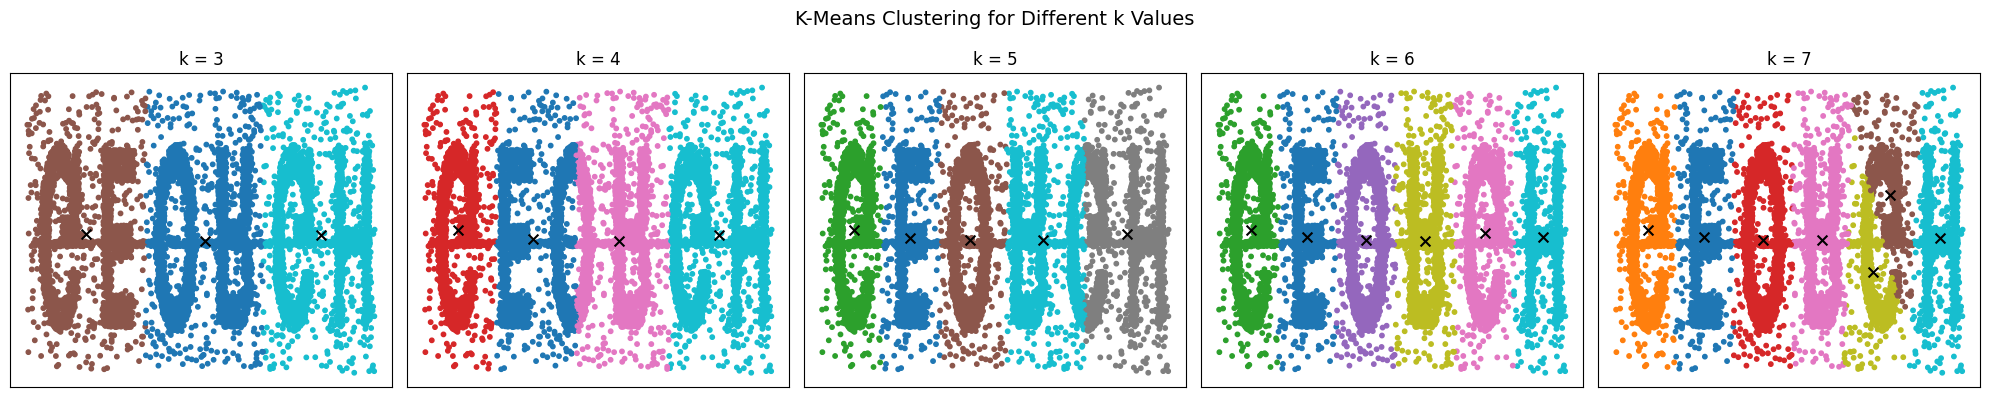

In [45]:
k_values = [3, 4, 5, 6, 7]
fig, axs = plt.subplots(1, len(k_values), figsize=(20, 4))

for idx, k in enumerate(k_values):
    centroids, labels = kmeans(X, k)
    axs[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
    axs[idx].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=50)
    axs[idx].set_title(f'k = {k}')
    axs[idx].set_xticks([])
    axs[idx].set_yticks([])

plt.suptitle('K-Means Clustering for Different k Values', fontsize=14)
plt.tight_layout()
plt.show()

As shown in the plots above, a chosen k cluster of 6 best clusters the data points. Let's apply implement the final k value on the training data below.

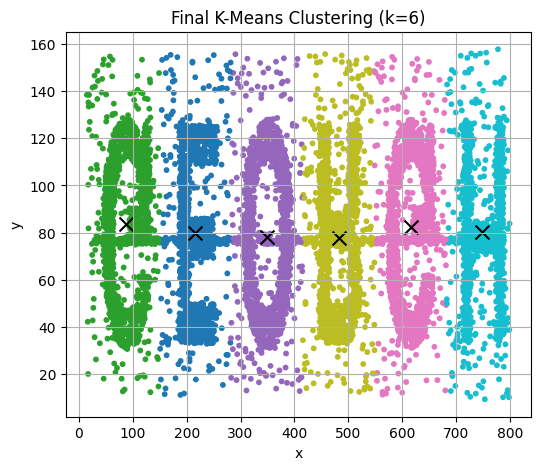

In [46]:
final_k = 6
final_centroids, final_labels = kmeans(X, final_k)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='tab10', s=10)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='x', s=100)
plt.title(f'Final K-Means Clustering (k={final_k})')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Task 3: Tune hyperparameters
Tune hyperparameters to best fit the natural grouping of points in the training set and use your trained model to assign cluster labels to the points in the testing data.

In [49]:
# Load test data
test = pd.read_csv('/Users/VarshiniPeddinti/Downloads/clusterData_test_unlabeled.dat', 
                   sep=r'\s+',     # handles any spaces or tabs
                   header=None, 
                   names=['x', 'y'], 
                   engine='python')
X_test = test[['x', 'y']].values
test.head(5)

,x,y
0,102.706094,41.058038
1,83.656740,70.899801
2,107.235326,73.237725
3,133.495565,59.450842
4,80.780068,78.680589


## Task 4: Visualize the predicted test clusters

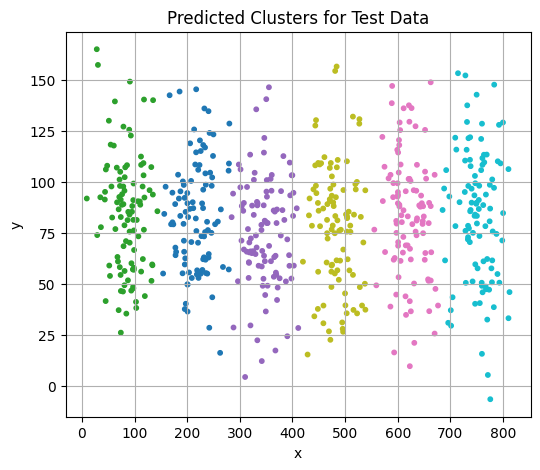

In [51]:
# Predict using nearest centroid
test_labels = assign_clusters(X_test, final_centroids)
test['label'] = test_labels
test.to_csv('test_predictions.csv', index=False)

# Visualize test clusters
plt.figure(figsize=(6, 5))
plt.scatter(test['x'], test['y'], c=test_labels, cmap='tab10', s=10)
plt.title('Predicted Clusters for Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [52]:
# Print centroid coordinates
print("Centroids (x, y) for each cluster:")
for i, center in enumerate(final_centroids):
    print(f"Cluster {i}: x = {center[0]:.2f}, y = {center[1]:.2f}")

Centroids (x, y) for each cluster:
Cluster 0: x = 214.96, y = 79.75
Cluster 1: x = 87.80, y = 83.52
Cluster 2: x = 349.15, y = 78.33
Cluster 3: x = 616.23, y = 82.19
Cluster 4: x = 482.08, y = 77.67
Cluster 5: x = 748.08, y = 80.15


In [57]:
test_predictions = test[['x', 'y', 'label']]
test_predictions.to_csv('test_predictions.csv', index=False)